In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys; sys.path.append('..')
import random, math, os
import pyzx as zx
from fractions import Fraction
from pyzx.phasepoly import circuit_phase_polynomial_blocks, optimize_block
import numpy as np
%config InlineBackend.figure_format = 'svg'
zx.quantomatic.quantomatic_location = r'C:\Users\John\Desktop\Quantomatic.jar'
zx.tikz.tikzit_location = r'C:\Users\John\Documents\tikzit\tikzit.exe'

In [27]:
circ_name = r'../circuits/Fast/nth_prime6.tfc'
#circ_name = "../circuits/PF/pf4_10_after"
c_orig = zx.Circuit.load(circ_name)
#c_orig = zx.Circuit.load(circ_name)
print(c_orig.to_basic_gates().stats())
#display(zx.draw(c_orig,figsize=(10,3),h_edge_draw='box'))
g = c_orig.to_graph()
zx.simplify.full_reduce(g,quiet=False)
g.normalise()
print(zx.tcount(g))
print("vertex count", len(list(g.vertices())))
#zx.draw(g,labels=True)

Circuit  on 9 qubits with 1241 gates.
        567 is the T-count
        674 Cliffords among which 
        502 2-qubit gates and 162 Hadamard gates.
spider_simp: 206. 169. 101. 57. 37. 24. 8. 3. 1.  9 iterations
id_simp: 88. 29.  2 iterations
spider_simp: 26.  1 iterations
pivot_simp: 26. 1.  2 iterations
lcomp_simp: 15. 15. 2. 2.  4 iterations
id_simp: 3.  1 iterations
spider_simp: 2. 1.  2 iterations
pivot_simp: 1.  1 iterations
lcomp_simp: 2. 2.  2 iterations
pivot_gadget_simp: 186. 83. 54. 37. 16. 8. 5. 1. 2.  9 iterations
id_simp: 37.  1 iterations
spider_simp: 13. 8. 4. 2. 3. 2. 1. 1. 1.  9 iterations
pivot_simp: 3.  1 iterations
lcomp_simp: 11. 11. 3. 4. 2. 1. 1. 1.  8 iterations
id_simp: 2.  1 iterations
spider_simp: 2.  1 iterations
pivot_simp: 1.  1 iterations
lcomp_simp: 1. 1.  2 iterations
gadget_simp: 105.  1 iterations
id_simp: 3.  1 iterations
spider_simp: 3.  1 iterations
pivot_simp: 14. 1.  2 iterations
lcomp_simp: 49. 47.  2 iterations
pivot_simp: 1.  1 iterations
pi

In [40]:
g = c_orig.to_graph()
g = zx.simplify.teleport_reduce(g,quiet=False)
print(zx.tcount(g))
c = zx.extract.streaming_extract(g).to_basic_gates()
c_orig.verify_equality(c)

spider_simp: 221. 170. 101. 58. 41. 27. 8. 3. 3.  9 iterations
id_simp: 63. 28.  2 iterations
spider_simp: 26.  1 iterations
pivot_simp: 26. 1.  2 iterations
lcomp_simp: 15. 15. 2. 2.  4 iterations
id_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
lcomp_simp: 1. 1.  2 iterations
pivot_gadget_simp: 181. 78. 59. 34. 17. 12. 7. 4. 2. 1. 1.  11 iterations
id_simp: 42.  1 iterations
spider_simp: 12. 8. 4. 4. 3. 2. 1. 2. 1. 1. 1. 1. 1.  13 iterations
pivot_simp: 3. 1. 1. 1.  4 iterations
lcomp_simp: 13. 13. 3. 4. 1.  5 iterations
id_simp: 15.  1 iterations
spider_simp: 4. 3. 1. 1. 1. 1. 1. 1. 1.  9 iterations
pivot_simp: 2. 1. 1.  3 iterations
lcomp_simp: 4. 4.  2 iterations
id_simp: 5.  1 iterations
spider_simp: 2. 1. 1. 1.  4 iterations
pivot_simp: 1.  1 iterations
gadget_simp: 84.  1 iterations
id_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
pivot_simp: 10. 1.  2 iterations
lcomp_simp: 47. 45.  2 iterations
pivot_simp: 1.  1 iterations
pivot_gadget_simp: 1.  1 iterations
gad

False

In [29]:
zx.compare_tensors(c_orig,c_opt)

False

In [26]:
from pyzx.simplify import spider_simp, id_simp, to_gh, pivot_simp, lcomp_simp, pivot_gadget_simp, gadget_simp
random.seed(470595)
quiet=False
circ = zx.generate.cliffordT(3,80,p_t=0.2)
g = circ.copy()
to_gh(g)
id_simp(g,quiet=True)
spider_simp(g,quiet=True)
id_simp(g,quiet=True)
spider_simp(g,quiet=True)
#id_simp(g,quiet=True)
#spider_simp(g,quiet=True)
#pivot_simp(g,quiet=True)
#lcomp_simp(g,quiet=True)
#pivot_gadget_simp(g,quiet=True)
#gadget_simp(g,quiet=True)

# id_simp(g,quiet=quiet)
#zx.simplify.full_reduce(g,quiet=False)
s = zx.simplify.Simplifier(g)
s.full_reduce(quiet)
zx.compare_tensors(s.mastergraph,s.simplifygraph)

pivot_simp: 5. 1. 1.  3 iterations
lcomp_simp: 13. 2.  2 iterations
id_simp: 1.  1 iterations
pivot_simp: 1. 1.  2 iterations
pivot_gadget_simp: 3. 1.  2 iterations
gadget_simp: 2.  1 iterations
id_simp: 2.  1 iterations
spider_simp: 2.  1 iterations
pivot_simp: 1.  1 iterations


True

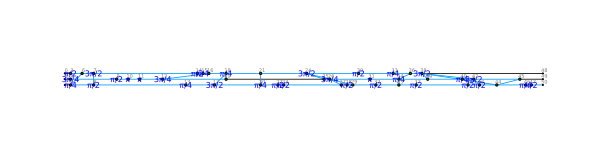

pivot_gadget_simp: 9. 2. 1. 1. 1.  5 iterations


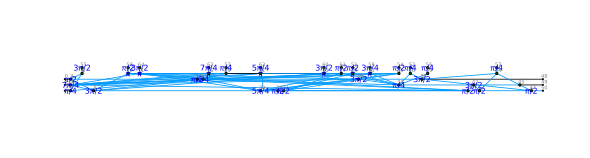

gadget_simp: 4.  1 iterations


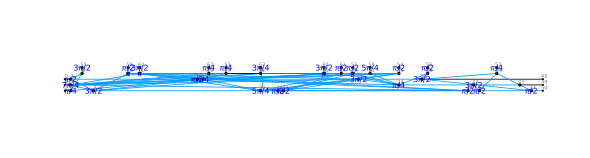

In [35]:
g2 = g.copy()
display(zx.draw(g2,labels=True))
pivot_gadget_simp(g2)
display(zx.draw(g2,labels=True))
gadget_simp(g2)
display(zx.draw(g2,labels=True))

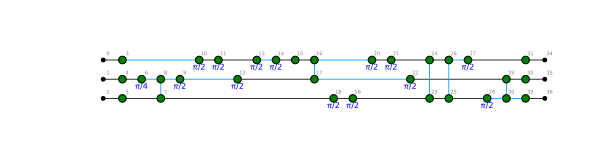

In [16]:
zx.draw(s.mastergraph,labels=True)

In [ ]:
zx.draw(g2)

In [235]:
zx.compare_tensors(g,g2)

True

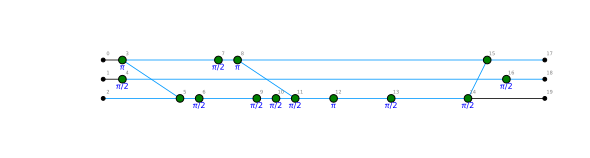

In [224]:
zx.draw(s.mastergraph,labels=True)

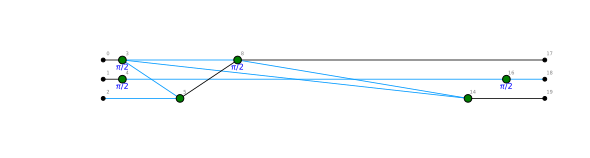

In [225]:
#id_simp(g,quiet=False)
zx.draw(s.simplifygraph,labels=True)

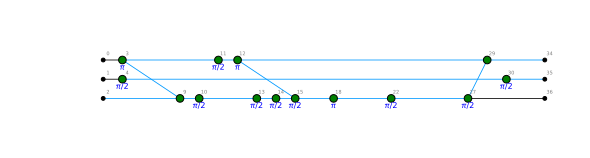

In [216]:
zx.draw(g,labels=True)

In [51]:
def gadget_H(c):
    try:
        # turn the last HAD into a CZ
        i = next(i for i in reversed(range(len(c.gates))) if c.gates[i].name == 'HAD')
        c.qubits += 1
        q = c.gates[i].target
        c.gates[i] = zx.circuit.CZ(q, q+1)
        
        # before gadget: nudge every qubit to the right of HAD over by 1
        for j in range(0,i):
            g = c.gates[j]
            if g.target > q: g.target += 1
            if hasattr(g, 'control') and g.control > q: g.control += 1
        
        # after gadget: nudge HAD's qubit and all qubits to the right of HAD over by 1
        for j in range(i+1,len(c.gates)):
            g = c.gates[j]
            if g.target >= q: g.target += 1
            if hasattr(g, 'control') and g.control >= q: g.control += 1
        
        return i
    except StopIteration:
        return None

def gadget_all_H(c):
    while gadget_H(c) != None: pass

In [89]:
def hcap_optimize(c,hcap):
    total = 0
    parsed = []
    hcount = 0
    blocks = 0
    for g in c.gates:
        if g.name == 'HAD':
            if hcount == hcap:
                new_c = zx.Circuit(c.qubits)
                new_c.gates = [h.copy() for h in parsed]
                gadget_all_H(new_c)
                print("block", blocks)
                opt_c = zx.optimize.phase_block_optimize(new_c, pre_optimize=False,quiet=True)
                print("tcount:", new_c.tcount(), "-->", opt_c.tcount())
                total += opt_c.tcount()
                hcount = 0
                blocks += 1
                parsed = []
            else:
                parsed.append(g)
                hcount += 1
        else:
            parsed.append(g)
    if parsed:
        new_c = zx.Circuit(c.qubits)
        new_c.gates = [h.copy() for h in parsed]
        gadget_all_H(new_c)
        print("block", blocks)
        opt_c = zx.optimize.phase_block_optimize(new_c, pre_optimize=False,quiet=True)
        print("tcount:", new_c.tcount(), "-->", opt_c.tcount())
        total += opt_c.tcount()
    return total

In [90]:
zx.todd.TOPT_LOCATION = ['C:\\WINDOWS\\SysNative\\wsl', '/mnt/c/Users/John/Documents/Projects/pyzx/TOpt']
#zx.todd.TOPT_LOCATION = None

In [101]:
circ_name = r'../circuits/Fast/barenco_tof_10_before'
c_orig = zx.Circuit.load(circ_name)
g = c_orig.to_graph()
print(zx.tcount(g))
g = zx.simplify.teleport_reduce(g)
c = zx.Circuit.from_graph(g).to_basic_gates()
#c = c_orig.to_basic_gates().copy()
print(c.stats())
c = zx.optimize.basic_optimization(c.split_phase_gates())
c = zx.optimize.basic_optimization(c.to_basic_gates())
print(c.to_basic_gates().stats())

hcap_optimize(c,15)

224
Circuit  on 19 qubits with 445 gates.
        100 is the T-count
        345 Cliffords among which 
        192 2-qubit gates and 98 Hadamard gates.
Circuit  on 19 qubits with 365 gates.
        100 is the T-count
        265 Cliffords among which 
        176 2-qubit gates and 34 Hadamard gates.
block 0
tcount: 48 --> 48
block 1
tcount: 39 --> 39
block 2
tcount: 13 --> 13


100

In [84]:
c2 = zx.optimize.phase_block_optimize(c.to_basic_gates(), pre_optimize=False,quiet=True)

In [85]:
print(c2.stats())

Circuit  on 19 qubits with 660 gates.
        100 is the T-count
        560 Cliffords among which 
        464 2-qubit gates and 34 Hadamard gates.


In [25]:
import os
import platform
import subprocess

is32bit = (platform.architecture()[0] == '32bit')
system32 = os.path.join(os.environ['SystemRoot'], 
                        'SysNative' if is32bit else 'System32')
bash = os.path.join(system32, 'wsl')

subprocess.check_output('"%s" ls' % bash)

b'ak.ipynb\ncython-test.ipynb\nJohnDoodle.ipynb\nLinalg.ipynb\nOptimize.ipynb\nwhat_are_these.txt\n'

In [26]:
bash

'C:\\WINDOWS\\SysNative\\wsl'

In [5]:
c4 = zx.optimize.phase_block_optimize(c, pre_optimize=False,quiet=False)
print(c4.stats())

new block
new block
new block
new block
new block
new block
new block
new block
new block
Circuit  on 7 qubits with 122 gates.
        28 is the T-count
        94 Cliffords among which 
        68 2-qubit gates and 10 Hadamard gates.


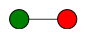

We will now set the phase of the spiders to a different value:


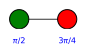

In [113]:
import pyzx as zx  #  This is the recommended way to import PyZX
g = zx.Graph()  #  We construct an empty ZX-diagram
v = g.add_vertex(1,0,0)  #  We add a single Z-spider at position (0,0)
w = g.add_vertex(2,0,1)  #  We add a single X-spider at position (0,1)
g.add_edge((v,w))        #  We connect the two spiders together
display(zx.draw(g,figsize=(1,0.3))) #  Draw the ZX-diagram onto the screen
print("We will now set the phase of the spiders to a different value:")
from fractions import Fraction    #   For this we need the Fraction class
g.set_phase(v,Fraction(1,2))      # The phase is set as a multiple of pi
g.set_phase(w,Fraction(3,4))
display(zx.draw(g,figsize=(1,0.3)))

In [114]:
g.to_tensor()

KeyError: 0

In [115]:
with open("../circuits/2-qubit-unitary.qgraph",'r') as f:
    g = zx.json_to_graph(f.read())

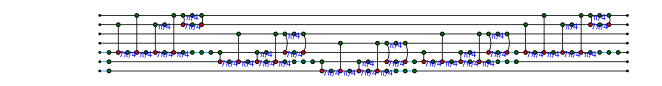

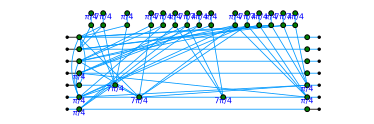

In [127]:
c = zx.Circuit.load("../circuits/Fast/tof_4_before")
display(zx.draw(c,figsize=(9,1)))
g = c.to_graph()
zx.simplify.full_reduce(g)
g.normalise()
display(zx.draw(g,figsize=(5,1.5)))

In [ ]:
zx.quantomatic.quantomatic_location

# Hadamard to Internal Vertices comparison

In [80]:
from pyzx.circuit import ZPhase
def count_internal_hadamards(c):
    count = 0
    tracking = dict()
    for g in c.gates:
        if g.name == 'HAD':
            if g.target not in tracking: continue
            else: tracking[g.target] += 1
        if isinstance(g, ZPhase) and g.phase.denominator > 2:
            if g.target in tracking: 
                count += tracking[g.target]
            tracking[g.target] = 0
    return count

def count_all_hadamards(c):
    return sum(1 for g in c.gates if g.name == 'HAD')

In [14]:
def count_internal_vertices(g):
    count = 0
    for v in g.vertices():
        if v in g.inputs or v in g.outputs: continue
        if len(list(g.neighbours(v))) == 1: continue
        should_continue = False
        for w in g.neighbours(v):
            if len(list(g.neighbours(w))) == 1:
                should_continue = True
                break
        if should_continue: continue
        count += 1
    return count

In [13]:
c = zx.optimize.basic_optimization(c_orig.to_basic_gates()).to_basic_gates()

count_internal_hadamards(c)

6

In [15]:
count_internal_vertices(g)

5

In [109]:
def generate_random_circuit(qubits, depth, p_had, p_t):
    p_cnot = 1-p_had-p_t
    c = zx.Circuit(qubits)
    for _ in range(depth):
        r = random.random()
        if r > 1-p_had:
            c.add_gate("HAD",random.randrange(qubits))
        elif r > 1-p_had-p_t:
            c.add_gate("T",random.randrange(qubits))
        else:
            tgt = random.randrange(qubits)
            while True:
                ctrl = random.randrange(qubits)
                if ctrl!=tgt: break
            c.add_gate("CNOT",tgt,ctrl)
    return c

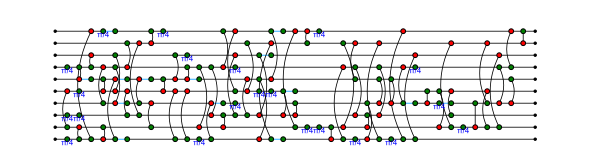

In [113]:
c = generate_random_circuit(10,100,p_had=0.2,p_t=0.2)
zx.draw(c)

In [115]:
g = c.to_graph()
zx.simplify.full_reduce(g)
g.normalise()
zx.d3.draw(g)

In [116]:
count_all_hadamards(c)

14

In [117]:
count_internal_vertices(g)

9

In [102]:
def generate_data_point(qubits, depth, p_had, p_t):
    c = generate_random_circuit(qubits, depth, p_had, p_t)
    c = zx.optimize.basic_optimization(c).to_basic_gates()
    had = count_all_hadamards(c)
    g = c.to_graph()
    zx.simplify.full_reduce(g)
    vert = count_internal_vertices(g)
    return (had,vert)

x,y = [],[]
for i in range(1,101):
    had,vert = generate_data_point(15, 50+i*10, p_had = 0.1, p_t = 0.15)
    x.append(had)
    y.append(vert)
    if i%10 == 0: print(i,end='. ')

10. 20. 30. 40. 50. 60. 70. 80. 90. 100. 

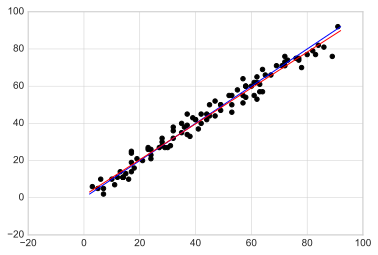

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.style.use('seaborn-whitegrid')
x = np.array(x)
y = np.array(y)
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

mi = min([min(x),min(y)])
ma = max([max(x),max(y)])
plt.scatter(x, y,color='black')
plt.plot([mi,ma],[mi,ma],'-',color='blue')
xfit = np.linspace(mi,ma,100)
yfit = model.predict(xfit[:, np.newaxis])
plt.plot(xfit,yfit,'-',color='red');

In [108]:
model.coef_

array([0.96390216])

# Experimental extraction code

In [25]:
from pyzx import Graph, tcount
from pyzx.extract import bi_adj, connectivity_from_biadj, permutation_as_swaps
from pyzx.linalg import column_optimal_swap

def extract(g, quiet=True):
    g.normalise()
    qs = g.qubits() # We are assuming that these are objects that update...
    rs = g.rows()   # ...to reflect changes to the graph, so that when...
    ty = g.types()  # ... g.set_row/g.set_qubit is called, these things update directly to reflect that
    phases = g.phases()
    
    h = Graph()
    
    qindex = {}
    depth = 0
    for i in range(len(g.inputs)):
        v = h.add_vertex(0,i,depth)
        h.inputs.append(v)
        qindex[i] = v
    depth = 1
    
    def add_phase_gate(q, phase):
        nonlocal depth
        v = h.add_vertex(1, q, depth, phase)
        h.add_edge((qindex[q],v),1)
        qindex[q] = v
        depth += 1
        return v
    def add_hadamard(q):
        nonlocal depth
        v = h.add_vertex(1, q, depth)
        h.add_edge((qindex[q],v),2)
        qindex[q] = v
        depth += 1
        return v
    def add_cnot(ctrl, tgt):
        nonlocal depth
        v1 = h.add_vertex(1, ctrl, depth)
        v2 = h.add_vertex(2, tgt, depth)
        h.add_edges([(qindex[ctrl],v1),(qindex[tgt],v2),(v1,v2)],1)
        qindex[ctrl] = v1
        qindex[tgt] = v2
        depth += 1
        return v1,v2
    def add_cz(ctrl, tgt):
        nonlocal depth
        v1 = h.add_vertex(1, ctrl, depth)
        v2 = h.add_vertex(1, tgt, depth)
        h.add_edges([(qindex[ctrl],v1),(qindex[tgt],v2)],1)
        h.add_edge((v1,v2),2)
        qindex[ctrl] = v1
        qindex[tgt] = v2
        depth += 1
        return v1,v2
    
    def add_gadget(targets, phase):
        nonlocal depth
        verts = {q:h.add_vertex(1,q,depth) for q in targets}
        axel = h.add_vertex(2,-1,depth+0.5)
        leaf = h.add_vertex(1,-2,depth+0.5,phase)
        h.add_edges([(qindex[q],verts[q]) for q in targets] + [(verts[q],axel) for q in targets] + [(axel,leaf)], 1)
        for q in targets: qindex[q] = verts[q]
        depth += 1
        return targets, axel, leaf
    
    def add_nonlocal_gadget(qubits, vertices, phase):
        nonlocal depth
        new_verts = {q:h.add_vertex(1,q,depth) for q in qubits}
        axel = h.add_vertex(2,-1,depth+0.5)
        leaf = h.add_vertex(1,-2,depth+0.5,phase)
        h.add_edges([(qindex[q],new_verts[q]) for q in qubits] + [(new_verts[q],axel) for q in qubits] + 
                    [(v,axel) for v in vertices] + [(axel,leaf)], 1)
        for q in qubits: qindex[q] = new_verts[q]
        depth += 1
        return new_verts, axel, leaf
    
    leftrow = 1
    #maxq = max(qs.values()) + 1
    
    gadgets = {}
    nodes = []
    for v in g.vertices():
        if rs[v] > 1: g.set_row(v, rs[v]+20)
        if v in g.inputs or v in g.outputs: continue
        if len(list(g.neighbours(v))) == 1: #phase gadget
            n = list(g.neighbours(v))[0]
            gadgets[n] = v
        elif all(w in g.inputs or w in g.outputs or len(list(g.neighbours(w)))!=1 for w in g.neighbours(v)): # regular vertex
            nodes.append(v)
    
    nodestotal = len(nodes)
    nodesparsed = 0
    nodestotal = 19
    
    processed_targets = {}
    while True:
        left = [v for v in g.vertices() if rs[v] == leftrow]
        for v in left:
            # First we add the gates to the circuit that can be processed now,
            # and we simplify the graph to represent this.
            q = qs[v]
            phase = phases[v]
            t = ty[v]
            if t != 1: raise TypeError("Only supports zx-diagrams in graph-like state")
            neigh = [w for w in g.neighbours(v) if rs[w]<leftrow]
            if len(neigh) != 1:
                raise TypeError("Graph doesn't seem circuit like: multiple parents")
            n = neigh[0]
            if qs[n] != q:
                raise TypeError("Graph doesn't seem circuit like: cross qubit connections")
            if g.edge_type(g.edge(n,v)) == 2:
                add_hadamard(q)
                g.set_edge_type(g.edge(n,v),1)
            #if t == 0: continue # it is an output
            if phase != 0:
                add_phase_gate(q, phase)
                g.set_phase(v, 0)
        
        boundary_verts = []
        neighbours = set()
        for v in left:
            q = qs[v]
            neigh = [w for w in g.neighbours(v) if rs[w]==leftrow and w<v]
            for n in neigh:
                q2 = qs[n]
                if g.edge_type(g.edge(v,n)) != 2:
                    raise TypeError("Invalid vertical connection between vertices of the same type")
                add_cz(q2, q)
                g.remove_edge(g.edge(v,n))
            d = [w for w in g.neighbours(v) if rs[w]>leftrow]
            neighbours.update(d)
        
        for w in neighbours:
            if w in gadgets:
                tgts = set(g.neighbours(w))
                tgts.remove(gadgets[w])
                if tgts.issubset(left):
                    add_gadget([qs[v] for v in tgts], phases[gadgets[w]])
                    g.remove_vertex(gadgets[w])
                    g.remove_vertex(w)
                elif tgts.issubset(left+list(processed_targets.keys())):
                    qubits = [qs[v] for v in left if v in tgts]
                    verts = [processed_targets[v] for v in tgts if v in processed_targets]
                    add_nonlocal_gadget(qubits,verts, phases[gadgets[w]])
                    g.remove_vertex(gadgets[w])
                    g.remove_vertex(w)
        neighbours = set()
        for v in left.copy():
            d = [w for w in g.neighbours(v) if rs[w]>leftrow]
            if any(w in g.outputs for w in d):
                if len(d) == 1:
                    left.remove(v)
                    continue
                b = [w for w in d if w in g.outputs][0]
                if all(w in gadgets or w==b for w in d):
                    processed_targets[v] = add_phase_gate(qs[v],0)
                    left.remove(v)
                    continue
                else:
                    q = qs[b]
                    r = rs[b]
                    w = g.add_vertex(1,q,r-1)
                    nodes.append(w)
                    e = g.edge(v,b)
                    et = g.edge_type(e)
                    g.remove_edge(e)
                    g.add_edge((v,w),2)
                    g.add_edge((w,b),3-et)
                    d.remove(b)
                    d.append(w)
            neighbours.update(d)
                
        if not left: break # We are done
        right = [w for w in neighbours if w in nodes]
        m = bi_adj(g,right,left)
        #print(m)
#         target = column_optimal_swap(m)
#         right = [right[j] for (i,j) in sorted(target,key=lambda x:x[0])]
#         m = bi_adj(g,right,left)
#         print()
#         print(m)
        neighbours.difference_update(right)
        neighbours = right + list(neighbours)
        cnots = m.to_cnots()
        m2 = bi_adj(g, neighbours, left)
        for cnot in cnots:
            m.row_add(cnot.target,cnot.control)
            m2.row_add(cnot.target, cnot.control)
            add_cnot(qs[left[cnot.control]],qs[left[cnot.target]])
        connectivity_from_biadj(g,m2,neighbours,left)
        good_verts = {}
        for i, row in enumerate(m.data):
            if sum(row) == 1:
                v = left[i]
                w = right[[j for j in range(len(m.data[i])) if m.data[i][j]][0]]
                good_verts[v] = w
        if not good_verts:
            print(m)
            print(left)
            print(right)
            print(nodes)
            raise Exception("No good match found")
        for v in left:
            if v not in good_verts:
                g.set_row(v,leftrow+1)
            else:
                g.set_row(good_verts[v],leftrow+1)
                g.set_qubit(good_verts[v],qs[v])
                if len(list(g.neighbours(v))) > 2: # Gadgets are still connected to it
                    w = add_phase_gate(qs[v],0)
                    processed_targets[v] = w
        leftrow += 1
        if leftrow >= nodestotal:
            nodestotal += 20
            for v in g.vertices():
                if rs[v] > leftrow: g.set_row(v,rs[v]+20)
    # We are done processing now. Time to deal with swaps.
    swap_map = {}
    for w in g.outputs:
        v = list(g.neighbours(w))[0]
        if g.edge_type(g.edge(v,w)) == 2:
            add_hadamard(qs[v])
            g.set_edge_type(g.edge(v,w),1)
        swap_map[qs[v]] = qs[w]
    for t1, t2 in permutation_as_swaps(swap_map):
        add_cnot(t1,t2)
        add_cnot(t2,t1)
        add_cnot(t1,t2)
    
    for i in range(len(g.outputs)):
        v = h.add_vertex(0,i,depth)
        h.outputs.append(v)
        h.add_edge((qindex[i],v),1)
        qindex[i] = v
    
    return h

In [29]:
g2 = g.copy()
h = extract(g2)
zx.id_simp(h,quiet=True)
zx.d3.draw(h)
# m2 = m.copy()
# m2.gauss(full_reduce=True)
# print(m2)

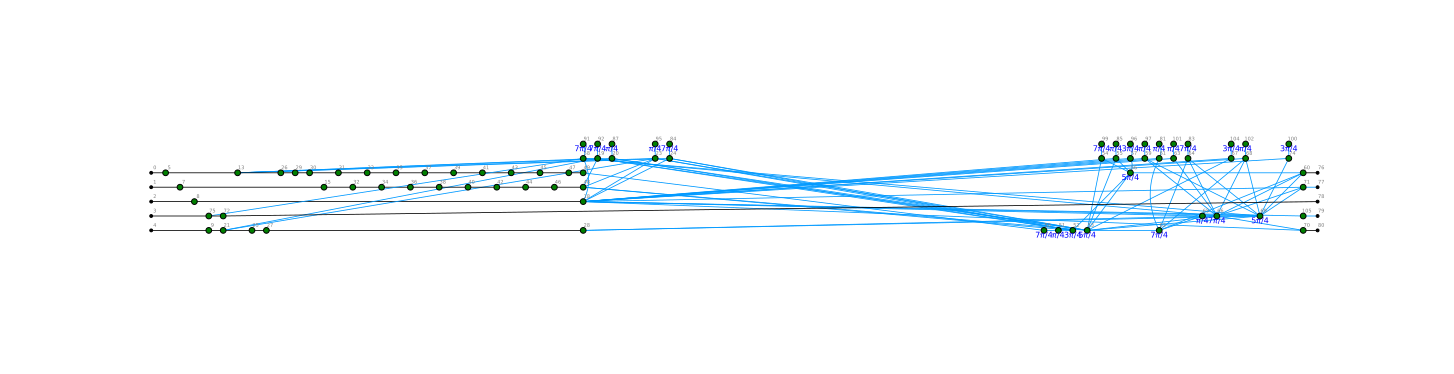

In [162]:
zx.draw(g2, figsize=(20,5),labels=True)

In [120]:
zx.compare_tensors(h,c_orig)

True

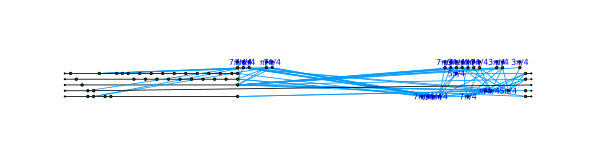

In [161]:
zx.draw(g2)

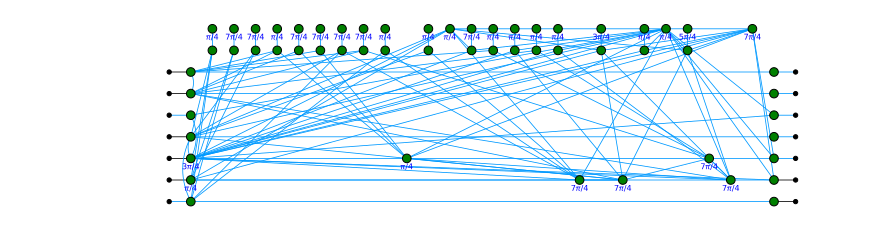

In [167]:
def sort_gadgets(g):
    rs = g.rows()
    ty = g.types()
    gadgets = {}
    for v in g.vertices():
        if len(list(g.neighbours(v))) == 1 and ty[v]==1:
            w = list(g.neighbours(v))[0]
            score = sum(rs[n] for n in g.neighbours(w))/len(list(g.neighbours(w)))
            gadgets[(w,v)] = score
    
    l = list(gadgets.items())
    l = sorted(l, key=lambda x: x[1])
    for i in range(len(l)):
        v,w = l[i][0]
        g.set_row(v, i+1.5)
        g.set_row(w, i+1.5)
    
sort_gadgets(g)
g.normalise()
zx.draw(g,figsize=(12,3))

# Todd on graph

In [23]:
from pyzx.circuit import ZPhase
from pyzx.linalg import Mat2
from pyzx.todd import todd_iter, MultiLinearPoly
#zx.todd.TOPT_LOCATION = os.path.expanduser("~/projects/pyzx/TOpt")
zx.todd.USE_REED_MULLER = False

def todd_on_graph(g):
    gadgets = {}
    t_nodes = []
    for v in g.vertices():
        if v not in g.inputs and v not in g.outputs and len(list(g.neighbours(v)))==1:
            if g.phase(v) != 0 and g.phase(v).denominator != 4: continue
            n = list(g.neighbours(v))[0]
            tgts = frozenset(set(g.neighbours(n)).difference({v}))
            gadgets[tgts] = (n,v)
        if g.phase(v) != 0 and g.phase(v).denominator == 4:
            t_nodes.append(v)
    
    if not gadgets:
        print("No phase gadgets found")
        return
    variables = set()
    for par in gadgets.keys():
        variables.update(par)
    
    for v in variables:
        if v in t_nodes:
            gadgets[frozenset({v})] = (v,v)
    
    targets = list(variables)
    n = len(targets)

    cols = []
    for par, (_,v) in gadgets.items():
        col = [0]*n
        for t in par:
            col[targets.index(t)] = 1
        phase = g.phase(v)
        for i in range(phase.numerator): cols.append(col)
        #cols.append(col)
    parmatrix = Mat2(cols).transpose()
    print(parmatrix.rows(), parmatrix.cols())
    #print(parmatrix)
    m2 = todd_iter(parmatrix)
    print(m2.rows(), m2.cols())
    
    newgadgets = []
    phases = dict()
    for col in m2.transpose().data:
        if sum(col) == 1:
            i = next(i for i,a in enumerate(col) if a)
            v = targets[i]
            if v in t_nodes:
                phases[v] = Fraction(1,4)
            else:
                phases[v] = g.phase(v) + Fraction(1,4)
        else:
            newgadgets.append(frozenset([targets[i] for i,a in enumerate(col) if a]))
    
    p = zx.todd.MultiLinearPoly()
    p.add_par_matrix(parmatrix,False)
    p.add_par_matrix(m2,True)
    correction = p.to_clifford()
    add_czs = {}
    for clif in correction:
        if isinstance(clif, ZPhase):
            v = targets[clif.target]
            if v in phases:
                phases[v] += clif.phase
            else:
                if v in t_nodes:
                    phases[v] = clif.phase
                else:
                    phases[v] = g.phase(v) + clif.phase
        elif clif.name == 'CZ':
            v1,v2 = targets[clif.control], targets[clif.target]
            add_czs[(v1,v2)] = (0,1)
    
    for v in targets:
        if v in phases:
            g.set_phase(v, phases[v])
        else:
            if v in t_nodes:
                g.set_phase(v, 0)
    g.add_edge_table(add_czs)
    
    rs = g.rows()
    positions = set()
    for gadget, (n,v) in gadgets.items():
        if len(gadget) == 1: continue # T-node
        if gadget in newgadgets:
            positions.add(rs[v])
            g.set_phase(v, Fraction(1,4))
            newgadgets.remove(gadget)
        else:
            g.remove_vertices((n,v))
    
    edges = []
    for par in newgadgets:
        pos = sum(rs[t] for t in par)/len(par) + 0.5
        while pos in positions: pos += 0.5
        n = g.add_vertex(1, -1, pos)
        v = g.add_vertex(1, -2, pos, phase=Fraction(1,4))
        edges.append((n,v))
        positions.add(pos)
        for t in par: edges.append((n,t))
    g.add_edges(edges, 2)
    

g2 = g.copy()
#display(zx.draw(g2,labels=True))
todd_on_graph(g2)
zx.full_reduce(g2)
g2.normalise()
print(zx.tcount(g2))
# todd_on_graph(g2)
# zx.full_reduce(g2)
# g2.normalise()
# print(zx.tcount(g2))
#zx.draw(g2)

7 57
7 13
13


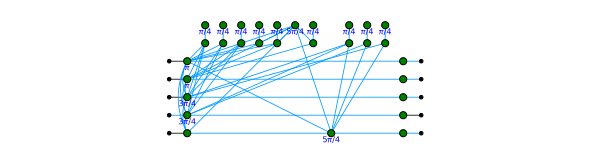

In [24]:
zx.draw(g2)

10
4
4


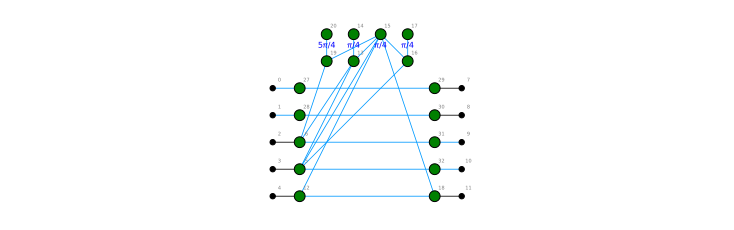

In [10]:
g3 = g2.copy()
try: c2 = zx.extract.streaming_extract(g3,allow_ancillae=True,quiet=True)
except: pass
print(zx.tcount(g3))
g3 = g3.adjoint()
try: c2 = zx.extract.streaming_extract(g3,allow_ancillae=True,quiet=True)
except: pass
zx.simplify.id_simp(g3, quiet=True)
g3.normalise()
print(zx.tcount(g3))
g3 = g3.adjoint()
try: c2 = zx.extract.streaming_extract(g3,allow_ancillae=True,quiet=True)
except: pass
zx.simplify.id_simp(g3, quiet=True)
g3.normalise()
print(zx.tcount(g3))
#zx.simplify.id_simp(g3, quiet=True)
zx.draw(g3,figsize=(10,3),labels=True)

In [3]:
random.seed(1344)
g = zx.generate.cliffordT(4,350,p_t=0.010)
zx.id_simp(g,quiet=True)
c = zx.Circuit.from_graph(g)
print(c.stats())
c2 = zx.optimize.basic_optimization(c.split_phase_gates())
print(c2.stats())
#zx.draw(c2,figsize=(25,5))

Circuit  on 4 qubits with 350 gates.
        4 is the T-count
        346 Cliffords among which 
        109 2-qubit gates and 0 Hadamard gates.
Circuit  on 4 qubits with 195 gates.
        4 is the T-count
        191 Cliffords among which 
        86 2-qubit gates and 43 Hadamard gates.


spider_simp: 58. 37. 17. 11. 4.  5 iterations
id_simp: 1.  1 iterations
spider_simp: 8. 1.  2 iterations
pivot_simp: 15. 6. 2. 2.  4 iterations
lcomp_simp: 33. 12. 11. 6. 6. 4. 4. 4. 3. 1. 1. 1. 1.  13 iterations


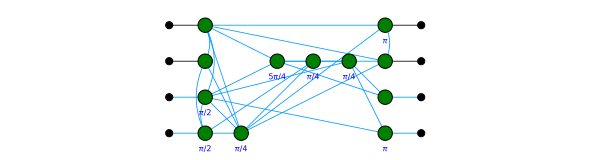

In [4]:
g2 = c2.to_graph()
zx.simplify.clifford_simp(g2)
g2.normalise()
zx.draw(g2)